In [1]:
%matplotlib inline

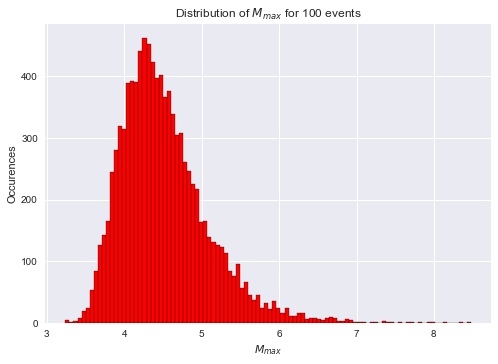

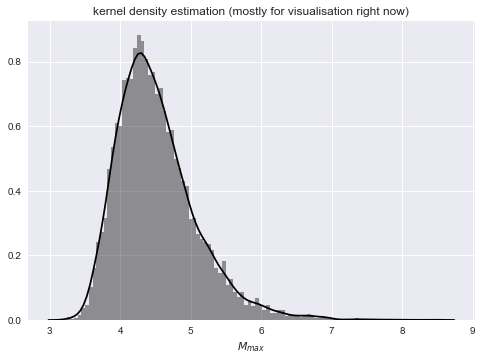

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Mon Nov 19 09:21:42 2018

@author: enic156
"""

import eq_functions as eq
import random as rnd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

rnd.seed(a=1756)
np.random.seed(1756)

# Script to generate a sample of 100 earthquake magnitues using GR law, and
# determine the largest magnitude of these 100 eventsm Mmax. Repeat many times to 
# estimate probability density function of Mmax.

# define parameters
Nt = 100 # total earthquakes to randomly sample at each iteration
a = np.log10(Nt)
b = 0.97
Mc = 2.2

n = int(1e4) # number of times to repeat the process

Mmax = np.empty(n) # initialise array containing largest magnitude event at each iteration
for i in range(n):
    events = eq.sample_magnitudes(Nt, Mc, b) # sample Nt magnitudes based off the distribution according to GR
    
#    # see what kind of distribution quakes are sampled from..
#    plt.figure(1)
#    plt.hist(events, color="darkblue", edgecolor = "black", bins = 100)
#    plt.show()
    
    Mmax[i] = events.max()


plt.figure(1)
plt.hist(Mmax, color="red", edgecolor = "black", bins = 100)
plt.title('Distribution of {} for {} events'.format("$M_{max}$", Nt))
plt.xlabel('$M_{max}$')
plt.ylabel('Occurences')
plt.show()

plt.figure(2)
sns.distplot(Mmax, hist=True, kde=True, bins = 100, color = "black")
plt.title('kernel density estimation (mostly for visualisation right now)')
plt.xlabel('$M_{max}$')
plt.show()

In [5]:
from ipywidgets import interact


def plot_mfd(a,b,Mc):
    Nt = int(10**a)
    events = eq.sample_magnitudes(Nt, Mc, b) # sample Nt magnitudes based off the distribution according to GR

    f,ax = plt.subplots(1,1,figsize=(12,8))
    # plot histogram of events
    ax.hist(events, color="red", edgecolor = "black", bins = 30)
    # plot cumulative magnitude frequency dist as black line
    Nbins = 40
    bin_edges=np.linspace(np.min(events), np.max(events), Nbins+1)
    bin_centers=0.5*(bin_edges[1:]+bin_edges[:-1])
    h, e =np.histogram(events, bins=bin_edges)
    bin_centers,yt=np.array([[m,h] for m, h in zip(bin_centers,h) if h>=1]).T
    N=np.flipud(np.cumsum(np.flipud(yt)))
    ax.plot(bin_centers, N, 'k-')
    
    ax.set_title('earthquake frequence distribution')
    ax.set_xlabel('$M$')
    ax.set_ylabel('frequency')
    ax.set_yscale('log')
    ax.set_ylim([0.5,2.e5])
    ax.set_xlim([1.8,8])
    plt.show()
    
interact(plot_mfd, a = (2,5,0.2), b = (0.8,1.4,0.1), Mc = (2,4,0.5))

<function __main__.plot_mfd>